<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install numpy
!pip install pandas
!pip install seaborn

En este ciclo se leen los archivos que contienen las temperaturas mínimas por año

In [4]:
Tmin = {}
for i in range(1985,2021):
  url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/Temperaturas-M%%C3%%ADnimas---Archivos/%dTmin.xlsx?raw=true" % i
  Tmin[i] = pd.read_excel(url, header = 1)

print(Tmin[1988])
              

                ENTIDAD        ENE        FEB  ...        NOV        DIC      ANUAL
0        AGUASCALIENTES   2.497177   5.524269  ...   5.634115   4.239822   8.664574
1       BAJA CALIFORNIA   5.206725   6.714443  ...   7.637992   4.783108  10.437920
2   BAJA CALIFORNIA SUR   8.688796  10.273474  ...  11.697917   9.024635  14.080099
3              CAMPECHE  16.543779  16.236805  ...  18.173256  16.334382  18.939291
4              COAHUILA   3.315495   5.369483  ...   8.495503   5.717293  11.147640
5                COLIMA  14.291305  14.620074  ...  16.721212  14.970430  17.094590
6               CHIAPAS  15.531224  15.376712  ...  16.900750  15.468242  17.596447
7             CHIHUAHUA  -1.452934   1.003743  ...   3.662381   0.172637   7.577014
8      CIUDAD DE MÉXICO   4.049147   6.035714  ...   5.456833   5.163858   8.233108
9               DURANGO   1.273002   3.594077  ...   4.723458   3.538996   8.232083
10           GUANAJUATO   4.089508   6.766294  ...   7.242675   6.045425   9

Se agregan las temperaturas anuales promedio a nivel nacional por año en un nuevo dataframe

     AÑO        ENE        FEB  ...        NOV        DIC      ANUAL
0   1985   7.995534   8.918779  ...  11.055804   9.244794  12.984091
1   1986   7.578413   9.166274  ...  12.024500   9.446455  13.027165
2   1987   7.519999   8.954563  ...  10.699737   9.627296  12.814918
3   1988   7.870151   9.495767  ...  10.847616   9.065313  12.991370
4   1989   9.107985   9.257366  ...  11.664921   8.487009  12.882815
5   1990   9.222580   9.610964  ...  11.517754   9.060314  13.365940
6   1991   9.139926   9.846789  ...  10.758246  10.329867  13.297236
7   1992   9.633963   9.344612  ...  11.244242  10.078912  13.297342
8   1993   9.816045   9.526274  ...  11.529239   9.416090  13.160741
9   1994   8.737544   9.895301  ...  12.172426  10.588145  13.474506
10  1995   9.094192  10.512600  ...  11.857846   9.442642  13.481103
11  1996   7.392487   9.483176  ...  10.762294   9.098409  12.961110
12  1997   8.003899   9.454244  ...  11.760791   8.427468  13.054715
13  1998   8.217383   8.057007  ..

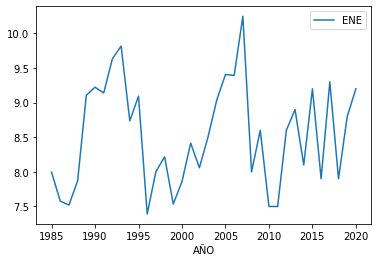

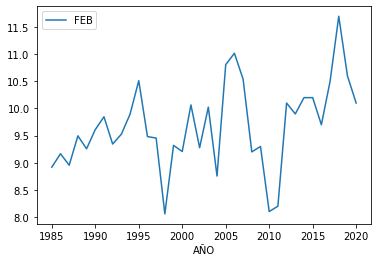

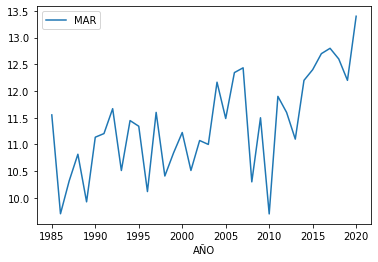

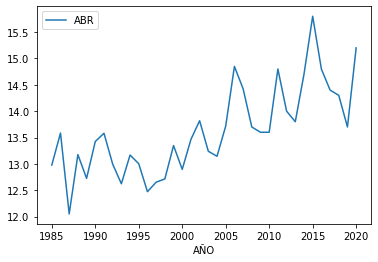

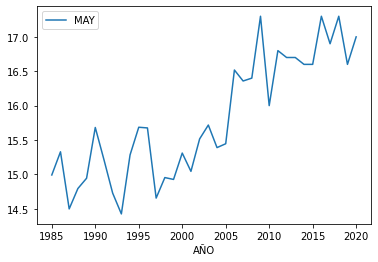

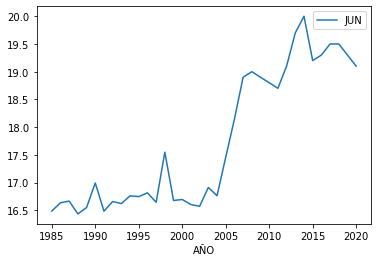

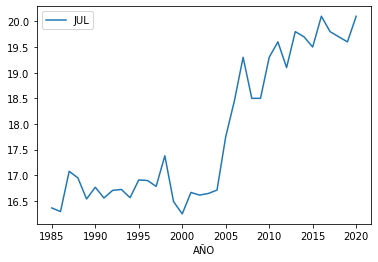

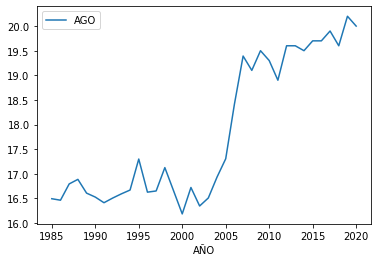

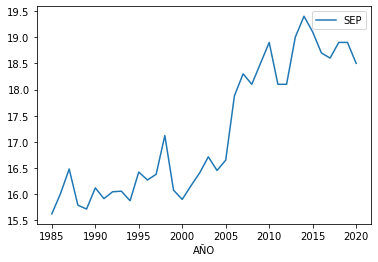

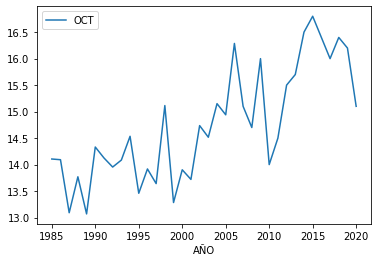

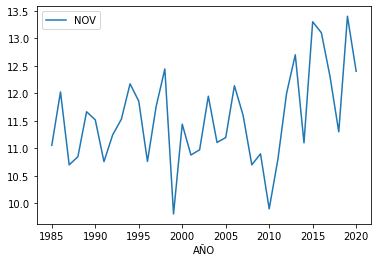

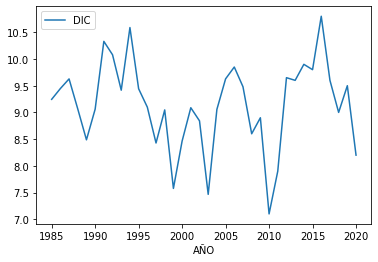

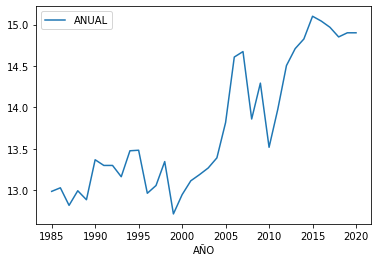

In [5]:
TminNacional = pd.DataFrame(Tmin[1985])

for i in range (0, 32):
  TminNacional = TminNacional.drop([i])
TminNacional = TminNacional.reset_index(drop=True)
TminNacional.at[0, "ENTIDAD"] = 1985

#Ciclo para guardar la fila 'NACIONAL' por cada año y concaternarla al dataframe con los datos de las temperaturas nacionales
for i in range (1986, 2021):
  Tmin1 = pd.DataFrame(Tmin[i])
  Tmin1 = Tmin1.drop(range(32))
  Tmin1 = Tmin1.reset_index(drop=True)
  Tmin1.at[0, "ENTIDAD"] = i #Se cambia el elemento con el nombre 'NACIONAL' por el año respectivo
  TminNacional = TminNacional.append(Tmin1, ignore_index=True) 

TminNacional = TminNacional.rename(columns={"ENTIDAD":"AÑO"})
print(TminNacional)

#Se grafican las temperaturas anuales promedio mínimas 
TminNacional.plot.line("AÑO", "ENE")
TminNacional.plot.line("AÑO", "FEB")
TminNacional.plot.line("AÑO", "MAR")
TminNacional.plot.line("AÑO", "ABR")
TminNacional.plot.line("AÑO", "MAY")
TminNacional.plot.line("AÑO", "JUN")
TminNacional.plot.line("AÑO", "JUL")
TminNacional.plot.line("AÑO", "AGO")
TminNacional.plot.line("AÑO", "SEP")
TminNacional.plot.line("AÑO", "OCT")
TminNacional.plot.line("AÑO", "NOV")
TminNacional.plot.line("AÑO", "DIC")
TminNacional.plot.line("AÑO", "ANUAL")




Se guardan las temperaturas mínimas promedio por estado en un dataframe por cada uno de ellos.

In [12]:
import pandas as pd

tmin_todasentidades = {}

#Se guarda en un arreglo los dataframes con las temperaturas mínimas de todos los estados, con un dataframe distinto por año
for i in range (1985, 2021):
  tmin_todasentidades[i] = pd.DataFrame (Tmin[i], columns = {'ENTIDAD', 'ANUAL'})

estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC']
#Se guardan en una lista los nombres de los estados tal y como vienen en el archivo inicial.
df = pd.DataFrame(Tmin[1985])
estados_comp = df['ENTIDAD'].tolist()

anios = range(1985, 2021) #Lista con los años de los dataframe
tmin_por_entidad = {}
#Ciclo para guardar los datos de cada estado.
for i in range(32):
  df_entidad = pd.DataFrame(columns={'ANIO', 'ANUAL'}) #Dataframe en el que se guardará los datos de un solo estado.
  for j in range (1985, 2021):
    l = j - 1985 #Variable para guardar el año    
    df = pd.DataFrame(tmin_todasentidades[j], columns = {'ANIO', 'ANUAL'}) #Se crea un dataframe con las columnas de 'Año' y 'Anual'
    df_entidad = df_entidad.append(df.loc[i], ignore_index=True) #Se copia la fila con los datos del estado correspondiente al nuevo dataframe
    df_entidad.at[l, 'ANIO'] = anios[l] #Se guarda el número del año correspondiente en el dataframe
  tmin_por_entidad[estados_abv[i]] = df_entidad #Se guarda en el diccionario de las temperaturas mínimas por entidad el dataframe creado en el ciclo


Se leen los archivos con los datos de las temperaturas máximas

In [22]:
Tmax = {}
for i in range(1985,2021):
  url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/Temperaturas-M%%C3%%A1ximas---Archivos/%dTmax.xlsx?raw=true" % i
  Tmax[i] = pd.read_excel(url, header = 1)

print(Tmax[1988])

                ENTIDAD        ENE        FEB  ...        NOV        DIC      ANUAL
0        AGUASCALIENTES  21.708237  24.858566  ...  26.146898  23.206546  25.805972
1       BAJA CALIFORNIA  20.004160  22.284390  ...  23.483014  20.024960  26.761500
2   BAJA CALIFORNIA SUR  24.931802  27.005604  ...  27.915512  25.014234  30.213833
3              CAMPECHE  29.917972  31.486503  ...  32.342636  30.359166  33.209535
4              COAHUILA  18.294692  20.964148  ...  25.659048  21.061371  26.593230
5                COLIMA  32.472769  34.154293  ...  32.361111  31.943102  32.669801
6               CHIAPAS  28.037901  29.619790  ...  29.216871  28.185667  29.995748
7             CHIHUAHUA  18.019198  20.667910  ...  24.371630  18.743952  25.888276
8      CIUDAD DE MÉXICO  21.519763  23.594458  ...  24.200741  21.530584  24.056559
9               DURANGO  20.399927  22.868345  ...  25.491478  21.836042  25.771732
10           GUANAJUATO  22.830697  25.672046  ...  26.197680  24.148031  26

Se guardan las temperaturas máximas por estado, en un dataframe distinto por cada uno de ellos (y uno también para el de todo el país)

In [42]:
import pandas as pd

tmax_todasentidades = {}

#Se guarda en un arreglo los dataframes con las temperaturas mínimas de todos los estados, con un dataframe distinto por año
for i in range (1985, 2021):
  tmax_todasentidades[i] = pd.DataFrame (Tmax[i]) #columns = {'ENTIDAD', 'ANUAL'})

estados_abv = ['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'CMX', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QUE', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'VER', 'YUC', 'ZAC', 'NAC']
#Se guardan en una lista los nombres de los estados tal y como vienen en el archivo inicial.
df = pd.DataFrame(Tmax[1985])
estados_comp = df['ENTIDAD'].tolist()

anios = range(1985, 2021) #Lista con los años de los dataframe
tmax_por_entidad = {}
#Ciclo para guardar los datos de cada estado.
for i in range(33):
  df_entidad = pd.DataFrame(columns=['ENTIDAD', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL']) #Dataframe en el que se guardará los datos de un solo estado.
  for j in range (1985, 2021):
    l = j - 1985 #Variable para guardar el año    
    df = pd.DataFrame(tmax_todasentidades[j]) #columns = {'ANIO', 'ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC', 'ANUAL'}) #Se crea un dataframe con las columnas de 'Año' y 'Anual'
    df_entidad = df_entidad.append(df.loc[i], ignore_index=True) #Se copia la fila con los datos del estado correspondiente al nuevo dataframe
    df_entidad.at[l, 'ENTIDAD'] = anios[l] #Se guarda el número del año correspondiente en el dataframe
  df_entidad.rename(columns = {'ENTIDAD':'AÑO'}, inplace = True)
  tmax_por_entidad[estados_abv[i]] = df_entidad #Se guarda en el diccionario de las temperaturas mínimas por entidad el dataframe creado en el ciclo

In [43]:
print (df_entidad)


     AÑO        ENE        FEB  ...        NOV        DIC      ANUAL
0   1985  23.275940  25.273419  ...  26.737107  24.652141  27.896589
1   1986  24.541887  26.631148  ...  26.742136  24.343063  28.157028
2   1987  24.162431  25.350814  ...  26.626803  25.507885  28.067159
3   1988  24.243815  26.398186  ...  27.646431  24.993220  28.255665
4   1989  25.482582  26.050366  ...  26.997680  23.437468  28.312638
5   1990  24.986249  25.563474  ...  26.691324  25.045590  28.128194
6   1991  24.943440  26.247155  ...  25.576920  24.001652  28.305724
7   1992  22.103100  24.426421  ...  25.601711  25.220065  27.621186
8   1993  24.859060  26.254070  ...  26.635741  25.657414  28.294081
9   1994  25.195257  26.718991  ...  27.606695  25.618855  28.786000
10  1995  25.119996  27.100769  ...  27.403662  25.070509  28.865623
11  1996  25.376695  27.056344  ...  26.705279  25.412331  28.696627
12  1997  24.379173  26.325980  ...  26.887725  24.143636  28.390730
13  1998  25.361233  26.285677  ..

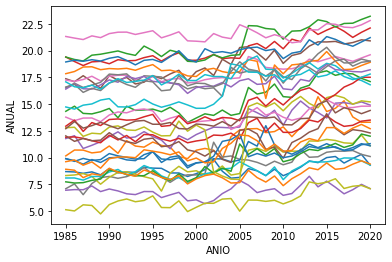

In [17]:
import seaborn as sns

for i in estados_abv:
  df = pd.DataFrame(tmin_por_entidad[i])
  sns.lineplot(data=df, x="ANIO", y="ANUAL")

